## **Week 3-5: Data Analysis, Preprocessing and Exploration**
- Load the dataset to inspect its structure and contents.
- Analyze the columns to determine their relevance to the task.
- Identify and handle any missing or inconsistent data.
- Clean the data by removing null or duplicate entries.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_score


In [3]:
!kaggle datasets download -d patrickb1912/ipl-complete-dataset-20082020
!unzip ipl-complete-dataset-20082020.zip

Dataset URL: https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020
License(s): DbCL-1.0
  0% 0.00/1.82M [00:00<?, ?B/s]
100% 1.82M/1.82M [00:00<00:00, 52.1MB/s]
Archive:  ipl-complete-dataset-20082020.zip
  inflating: deliveries.csv          
  inflating: matches.csv             


In [4]:
matches = pd.read_csv('matches.csv')

In [5]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
matches["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [7]:
teams = [ 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Chennai Super Kings',
        'Sunrisers Hyderabad',
        'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru']

**Team Name Standardization and Focus on Active Teams**

In [8]:
matches["team2"]=matches["team2"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
matches["team1"]=matches["team1"].str.replace("Delhi Daredevils","Delhi Capitals")
matches["team2"]=matches["team2"].str.replace("Delhi Daredevils","Delhi Capitals")
matches["toss_winner"]=matches["toss_winner"].str.replace("Delhi Daredevils","Delhi Capitals")
matches["winner"]=matches["winner"].str.replace("Delhi Daredevils","Delhi Capitals")
matches["team1"]=matches["team1"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches["team2"]=matches["team2"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches["toss_winner"]=matches["toss_winner"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches["winner"]=matches["winner"].str.replace("Deccan Chargers","Sunrisers Hyderabad")
matches["team1"]=matches["team1"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
matches["toss_winner"]=matches["toss_winner"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
matches["winner"]=matches["winner"].str.replace("Royal Challengers Bangalore","Royal Challengers Bengaluru")
matches["team2"]=matches["team2"].str.replace("Kings XI Punjab","Punjab Kings")
matches["team1"]=matches["team1"].str.replace("Kings XI Punjab","Punjab Kings")
matches["toss_winner"]=matches["toss_winner"].str.replace("Kings XI Punjab","Punjab Kings")
matches["winner"]=matches["winner"].str.replace("Kings XI Punjab","Punjab Kings")

**Venue Name Standardization**

In [9]:
matches["venue"] = matches["venue"].str.replace("Arun Jaitley Stadium, Delhi", "Arun Jaitley Stadium")
matches["venue"] = matches["venue"].str.replace("Brabourne Stadium, Mumbai", "Brabourne Stadium")
matches["venue"] = matches["venue"].str.replace("Dr DY Patil Sports Academy, Mumbai", "Dr DY Patil Sports Academy")
matches["venue"] = matches["venue"].str.replace("Eden Gardens, Kolkata", "Eden Gardens")
matches["venue"] = matches["venue"].str.replace("M Chinnaswamy Stadium, Bengaluru", "M.Chinnaswamy Stadium")
matches["venue"] = matches["venue"].str.replace("MA Chidambaram Stadium, Chepauk", "MA Chidambaram Stadium")
matches["venue"] = matches["venue"].str.replace("MA Chidambaram Stadium, Chepauk, Chennai", "MA Chidambaram Stadium")
matches["venue"] = matches["venue"].str.replace("Punjab Cricket Association IS Bindra Stadium, Mohali", "Punjab Cricket Association IS Bindra Stadium")
matches["venue"] = matches["venue"].str.replace("Punjab Cricket Association IS Bindra Stadium, Chandigarh", "Punjab Cricket Association IS Bindra Stadium")
matches["venue"] = matches["venue"].str.replace("Rajiv Gandhi International Stadium, Uppal", "Rajiv Gandhi International Stadium")
matches["venue"] = matches["venue"].str.replace("Rajiv Gandhi International Stadium, Uppal, Hyderabad", "Rajiv Gandhi International Stadium")
matches["venue"] = matches["venue"].str.replace("Wankhede Stadium, Mumbai", "Wankhede Stadium")
matches["venue"] = matches["venue"].str.replace("Sardar Patel Stadium, Motera", "Narendra Modi Stadium, Ahmedabad")
matches["venue"] = matches["venue"].str.replace("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam", "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium")
matches["venue"] = matches["venue"].str.replace("Punjab Cricket Association Stadium, Mohali", "Punjab Cricket Association IS Bindra Stadium")
matches["venue"] = matches["venue"].str.replace("M Chinnaswamy Stadium", "M.Chinnaswamy Stadium")
matches["venue"] = matches["venue"].str.replace("Sawai Mansingh Stadium, Jaipur", "Sawai Mansingh Stadium")
matches["venue"] = matches["venue"].str.replace("Sheikh Zayed Stadium", "Zayed Cricket Stadium, Abu Dhabi")
matches["venue"] = matches["venue"].str.replace("Maharashtra Cricket Association Stadium, Pune", "Maharashtra Cricket Association Stadium")
matches["venue"] = matches["venue"].str.replace("Himachal Pradesh Cricket Association Stadium, Dharamsala", "Himachal Pradesh Cricket Association Stadium")

In [10]:
matches['venue'].unique()

array(['M.Chinnaswamy Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium', 'MA Chidambaram Stadium',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Narendra Modi Stadium, Ahmedabad', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex',
       'Zayed Cricket Stadium, Abu Dhabi', 'Sharj

In [11]:
matches[matches['team1'].isin(teams)]
matches = matches[matches['team2'].isin(teams)]

**Removing Defunct Teams to Focus on Active Teams**

In [12]:
teams_to_remove = [
'Rising Pune Supergiants'
,
'Rising Pune Supergiant'
,
'Pune Warriors'
,
'Gujarat Lions'
 ,
'Kochi Tuskers Kerala'
]

columns_to_check = [
'team1'
,
'team2'
]


condition = ~matches[columns_to_check].isin(teams_to_remove).any(axis=1)

matches = matches[condition]

In [13]:
matches.shape

(980, 20)

In [14]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M.Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association IS Bindra Stadium,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bengaluru,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [15]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [16]:
matches['season'] = pd.to_datetime(matches['season'], format='%Y', errors='coerce')

matches['date'] = pd.to_datetime(matches['date'], errors='coerce')

In [17]:
matches.isnull().sum()

,0
id,0
season,178
city,51
date,0
match_type,0
player_of_match,4
venue,0
team1,0
team2,0
toss_winner,0


In [18]:
for i in matches.select_dtypes(include = 'object').columns:
    matches[i].fillna(matches[i].mode()[0], inplace = True)

matches['season'] = matches['season'].fillna(matches['season'].mode()[0])  # Filling with mode

for i in matches.select_dtypes(include = 'number').columns:
    matches[i].fillna(matches[i].mean(), inplace = True)

<ipython-input-18-a27643f1d5c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches[i].fillna(matches[i].mode()[0], inplace = True)
<ipython-input-18-a27643f1d5c9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [19]:
matches.duplicated().sum()

0

In [20]:
matches.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,980.0,919521.931633,376463.443761,335982.0,548338.25,1031805.0,1254091.25,1426312.0
result_margin,980.0,17.463136,21.606553,1.0,6.00,8.0,20.00,146.0
target_runs,980.0,166.835378,33.301398,43.0,147.00,167.0,188.00,288.0
target_overs,980.0,19.764008,1.580064,5.0,20.00,20.0,20.00,20.0


**Exploratory Data Analysis (EDA)**
- Perform descriptive statistics to understand the data distribution.
- Visualize relationships between variables using plots and graphs.
- Identify trends or patterns that might influence match outcomes.


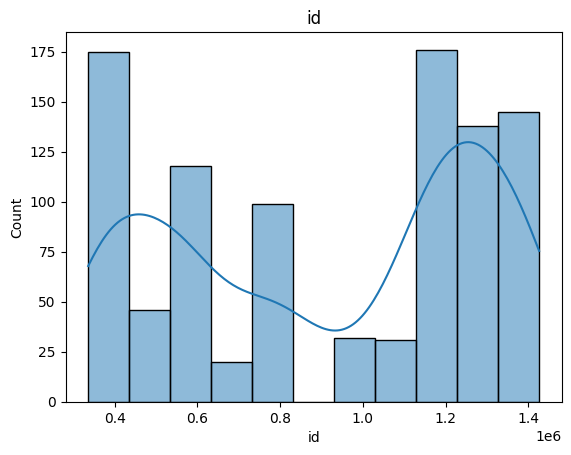

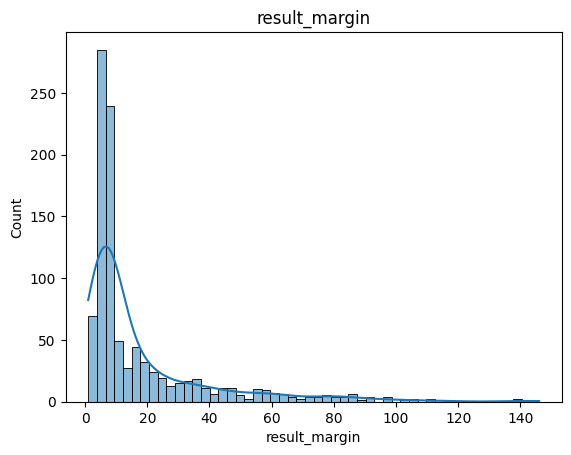

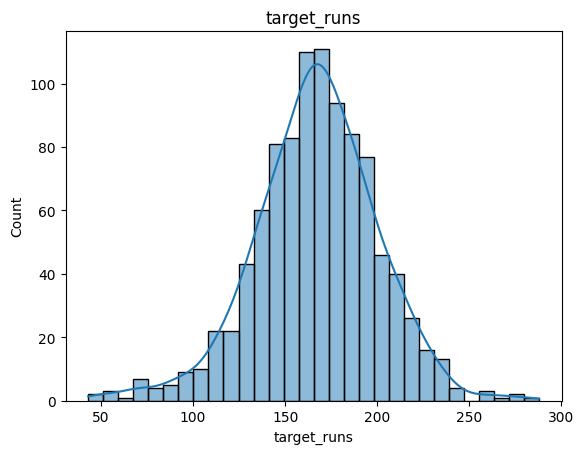

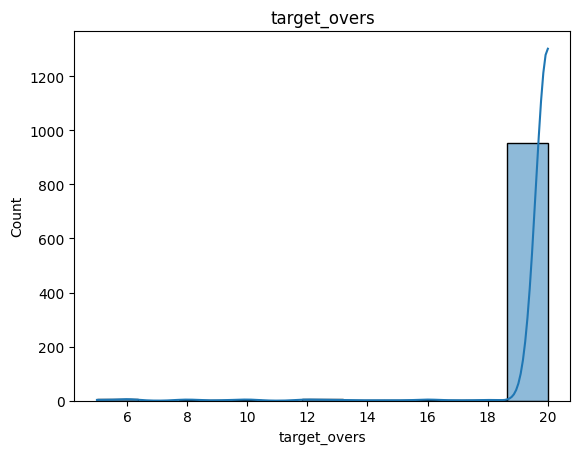

In [21]:
for i in matches.select_dtypes(include = 'number').columns:
    sns.histplot(data = matches, x = i, kde = True)
    plt.title(f"{i}")
    plt.show()

In [22]:
import plotly.express as px
city_counts = matches['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

fig = px.bar(city_counts, x='city', y='count',
             title='Number of Matches Played in Different Cities',
             labels={'city': 'City', 'count': 'Match Count'},
             color='count', height=500)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(
height = 500,
width = 900)
fig.show()

In [23]:
matches['result_description'] = matches['result'] + ' (' + matches['result_margin'].astype(str) + ')'

fig = px.scatter(
    matches,
    x='result_margin',
    y='target_runs',
    color='result',  # Differentiates based on result type (runs/wickets)
    title='Result Margin vs Target Runs',
    hover_data=['result_description']
)
fig.show()


In [24]:
fig = px.pie(matches, names='winner', title='Winners Over Time')
fig.show()

In [25]:
toss_winner_data = matches.groupby(['toss_decision', 'winner']).size().reset_index(name='count')

# Split the data based on 'toss_decision'
data_bat = toss_winner_data[toss_winner_data['toss_decision'] == 'bat']
data_field = toss_winner_data[toss_winner_data['toss_decision'] == 'field']

# Create the bar chart for 'bat'
fig_bat = px.bar(data_bat,
                 x='winner',
                 y='count',
                 title='Impact of Toss Decision on Match Winner (Bat)',
                 labels={'winner': 'Winner', 'count': 'Match Count'},
                 color='winner',
                 hover_data={'winner': True, 'count': True})

# Update layout for the 'bat' chart
fig_bat.update_layout(
    xaxis_title="Match Winner",
    yaxis_title="Number of Matches",
    legend_title="Winner"
)

# Create the bar chart for 'field'
fig_field = px.bar(data_field,
                   x='winner',
                   y='count',
                   title='Impact of Toss Decision on Match Winner (Field)',
                   labels={'winner': 'Winner', 'count': 'Match Count'},
                   color='winner',
                   hover_data={'winner': True, 'count': True})

# Update layout for the 'field' chart
fig_field.update_layout(
    xaxis_title="Match Winner",
    yaxis_title="Number of Matches",
    legend_title="Winner"
)

# Display the charts
fig_bat.show()
fig_field.show()

In [26]:
matches['toss_vs_match'] = matches.apply(lambda x: 'Yes' if x['toss_winner'] == x['winner'] else 'No', axis=1)

toss_vs_match_counts = matches['toss_vs_match'].value_counts().reset_index()
toss_vs_match_counts.columns = ['toss_vs_match', 'count']

fig = px.pie(toss_vs_match_counts, values = 'count',
             names = 'toss_vs_match',
             title = 'Did Toss Winner Win the Match?',
             color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

In [27]:
matches['toss_winner_won'] = matches.apply(lambda x: 'Won' if x['toss_winner'] == x['winner'] else 'Lost', axis=1)

team_toss_wins = matches.groupby(['toss_winner', 'toss_winner_won']).size().unstack(fill_value=0).reset_index()

# Calculate percentage of wins after winning the toss for each team
team_toss_wins['Total'] = team_toss_wins['Won'] + team_toss_wins['Lost']
team_toss_wins['Win_Percentage'] = (team_toss_wins['Won'] / team_toss_wins['Total']) * 100

# Display the data frame to verify correctness
print(team_toss_wins[['toss_winner', 'Win_Percentage']])

toss_winner_won                  toss_winner  Win_Percentage
0                        Chennai Super Kings       61.344538
1                             Delhi Capitals       45.454545
2                             Gujarat Titans       63.636364
3                      Kolkata Knight Riders       54.464286
4                       Lucknow Super Giants       52.631579
5                             Mumbai Indians       54.477612
6                               Punjab Kings       40.196078
7                           Rajasthan Royals       49.137931
8                Royal Challengers Bengaluru       50.434783
9                        Sunrisers Hyderabad       40.000000


**Encoding categorical variables e.g., team names, venue, toss_decision, toss_winner.**

In [28]:
# Initialize the encoder
encoder = OrdinalEncoder()

# Fit the encoder on all unique team names from both columns
encoder.fit(matches[['team1', 'team2','toss_winner','winner']].stack().unique().reshape(-1, 1))

# Transform both columns using the fitted encoder
matches['team1_encoded'] = encoder.transform(matches[['team1']])
matches['team2_encoded'] = encoder.transform(matches[['team2']])
matches['toss_winner_encoded'] = encoder.transform(matches[['toss_winner']])
matches['winner_encoded'] = encoder.transform(matches[['winner']])
matches['venue_encoded'] = encoder.fit_transform(matches[['venue']])
matches['toss_decision_encoded'] = encoder.fit_transform(matches[['toss_decision']])
matches['result_encoded'] = encoder.fit_transform(matches[['result']])
matches['city_encoded'] = encoder.fit_transform(matches[['city']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but OrdinalEncoder was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but OrdinalEncoder was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but OrdinalEncoder was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but OrdinalEncoder was fitted without feature names



## **Week 6-7: Clustering**

Clustering groups data points into clusters based on their similarity, with the goal of uncovering patterns or structures in the data. It helps identify distinct categories or behaviors within a dataset, making it easier to analyze and interpret complex information.

**Clustering: Group data by venues and calculate metrics for clustering**


**Cluster 0:  Moderately Utilized, Balanced Venues**

Venues with moderate match frequency and average target scores.

Examples: Barabati Stadium, Dr. DY Patil Sports Academy.

**Cluster 1: High-Usage, Well-Balanced Venues**

Venues with high match frequency, balanced scores, and results.

Examples: Wankhede Stadium, Eden Gardens, M. Chinnaswamy Stadium.

**Cluster 2: Low-Scoring, Rarely Used Venues**

Venues with low scores, limited matches, and distinct match dynamics.

Examples: Newlands, Buffalo Park.

**Cluster 3: Low-Margin, Occasionally Used Venues**

Venues hosting occasional matches with small result margins.

Examples: Kingsmead, JSCA International Stadium Complex.

**Cluster 4: High-Scoring, Specialized Venues**

Venues known for high-scoring matches but used less frequently.

Examples: Arun Jaitley Stadium, Brabourne Stadium.

**Cluster 5: High-Result-Margin Venues**

Venues characterized by significant result margins and occasional usage.

Examples: Himachal Pradesh Cricket Association Stadium, Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium.

                                               venue   avg_score  \
0                               Arun Jaitley Stadium  184.166667   
1                                   Barabati Stadium  165.666667   
2                Barsapara Cricket Stadium, Guwahati  181.000000   
3  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...  169.345384   
4                                  Brabourne Stadium  179.518519   

   avg_result_margin  matches_played  win_rate_batting_first  
0          18.315438              30                     0.0  
1          13.333333               6                     0.0  
2          22.333333               3                     0.0  
3          20.104510              14                     0.0  
4          16.481481              27                     0.0  


<ipython-input-29-c752489c2fac>:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





                                                venue   avg_score  \
0                                Arun Jaitley Stadium  184.166667   
1                                    Barabati Stadium  165.666667   
2                 Barsapara Cricket Stadium, Guwahati  181.000000   
3   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...  169.345384   
4                                   Brabourne Stadium  179.518519   
5                                        Buffalo Park  148.333333   
6                               De Beers Diamond Oval  159.000000   
7                          Dr DY Patil Sports Academy  164.500000   
8   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...  169.416667   
9                 Dubai International Cricket Stadium  164.760870   
10                                       Eden Gardens  165.965517   
11                                   Feroz Shah Kotla  160.750000   
12       Himachal Pradesh Cricket Association Stadium  184.769231   
13                             Hol

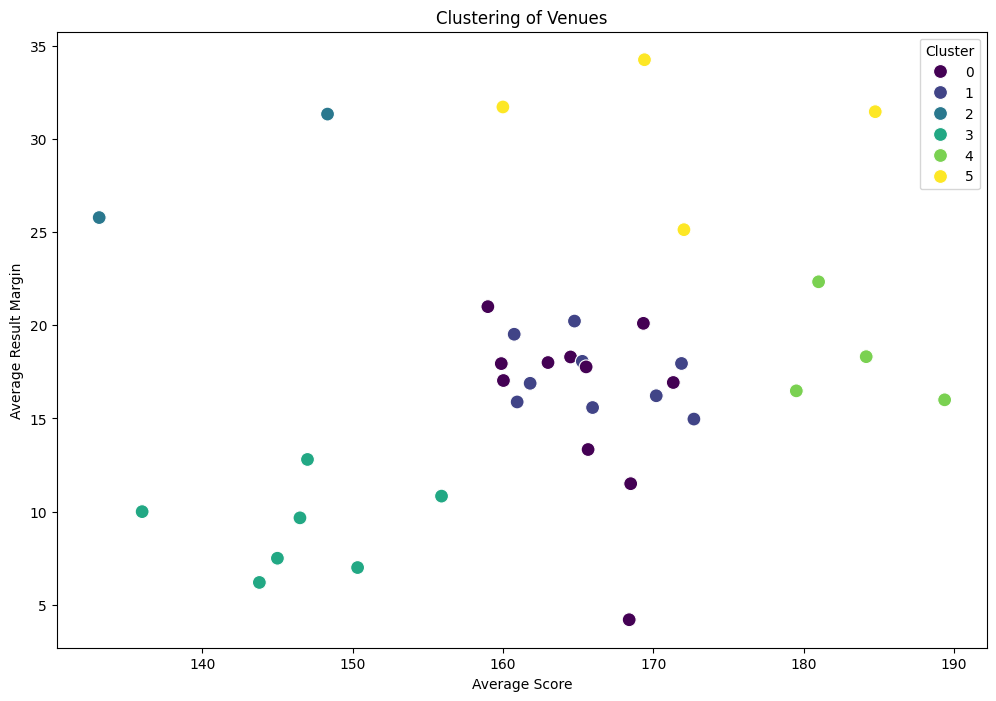

In [29]:
# Group by venue and calculate metrics
venue_data = matches.groupby('venue').agg(
    avg_score=('target_runs', 'mean'),               # Average target score
    avg_result_margin=('result_margin', 'mean'),    # Average result margin
    matches_played=('id', 'count'),                 # Number of matches played
).reset_index()

# Calculate win rate for batting first (result by "runs")
venue_data['win_rate_batting_first'] = matches[matches['result'] == 'runs'].groupby('venue')['result'].count() / matches.groupby('venue')['result'].count()

# Fill NaN values in `win_rate_batting_first`
venue_data['win_rate_batting_first'].fillna(0, inplace=True)

# Verify the DataFrame
print(venue_data.head())

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(venue_data[['avg_score', 'avg_result_margin', 'matches_played', 'win_rate_batting_first']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
venue_data['cluster'] = kmeans.fit_predict(scaled_features)

# Display the updated DataFrame
print(venue_data)

# Visualize the updated clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='avg_score',
    y='avg_result_margin',
    hue='cluster',
    palette='viridis',
    data=venue_data,
    s=100
)
plt.title('Clustering of Venues')
plt.xlabel('Average Score')
plt.ylabel('Average Result Margin')
plt.legend(title='Cluster')
plt.show()


**Silhouette Score Analysis for Optimal Clusters**

To determine the optimal number of clusters for venue-based clustering, the Silhouette Score was calculated for cluster sizes ranging from 2 to 10. The Silhouette Score measures how well each data point fits within its assigned cluster, with higher scores indicating better-defined clusters.

The plot below illustrates the Silhouette Scores for different numbers of clusters (k). The optimal number of clusters corresponds to the value of k where the Silhouette Score is maximized. This analysis helps in selecting the most appropriate cluster size for meaningful segmentation of the data.

The Silhouette Score analysis revealed that a cluster size of 6 was optimal, indicating well-defined and meaningful groupings in the data. This choice ensures the segmentation effectively captures the underlying patterns among venues.

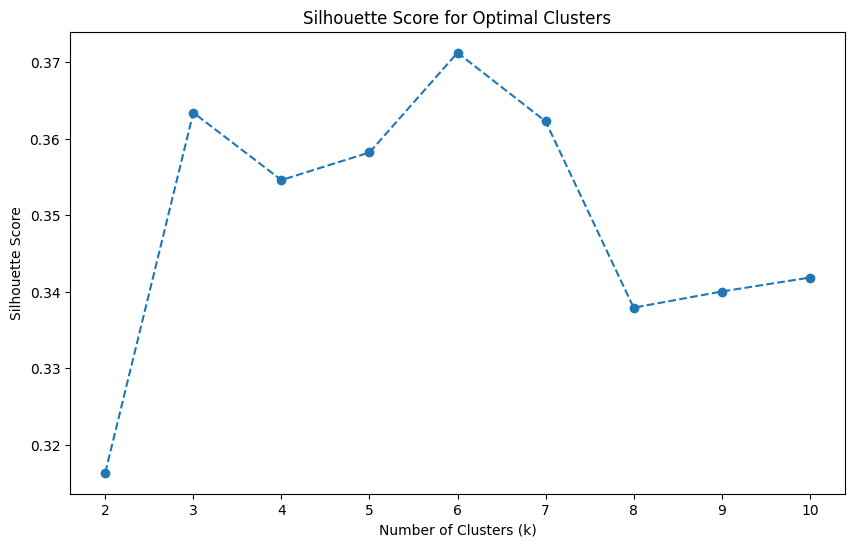

In [30]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(venue_data[['avg_score', 'avg_result_margin', 'matches_played', 'win_rate_batting_first']])

silhouette_scores = []
for k in range(2, 11):  # Silhouette Score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

**Clustering: Team Performance Based on Margins**

**Cluster 0: Balanced Teams with Moderate Margins**

Teams with average performance, achieving balanced margins in runs and wickets.
Examples: Delhi Capitals, Kolkata Knight Riders, Rajasthan Royals.

**Cluster 1: Consistent Teams with Strategic Victories**

Teams known for their calculated, low-margin victories, often focused on strategy.
Examples: Lucknow Super Giants.

**Cluster 2: Dominant Teams with High Margins**

Teams excelling in both runs and wickets, indicating their dominance in matches.
Examples: Chennai Super Kings, Mumbai Indians.

In [31]:
# Initialize new columns with default values as 0
matches['result_margin_runs'] = 0
matches['result_margin_wickets'] = 0

# Populate result_margin_runs and result_margin_wickets based on conditions
matches['result_margin_runs'] = matches.apply(
    lambda x: x['result_margin'] if x['result'] == 'runs' else 0, axis=1
)

matches['result_margin_wickets'] = matches.apply(
    lambda x: x['result_margin'] if x['result'] == 'wickets' else 0, axis=1
)

# Check the resulting DataFrame
print(matches[['result', 'result_margin', 'result_margin_runs', 'result_margin_wickets']].head())


    result  result_margin  result_margin_runs  result_margin_wickets
0     runs          140.0               140.0                    0.0
1     runs           33.0                33.0                    0.0
2  wickets            9.0                 0.0                    9.0
3  wickets            5.0                 0.0                    5.0
4  wickets            5.0                 0.0                    5.0


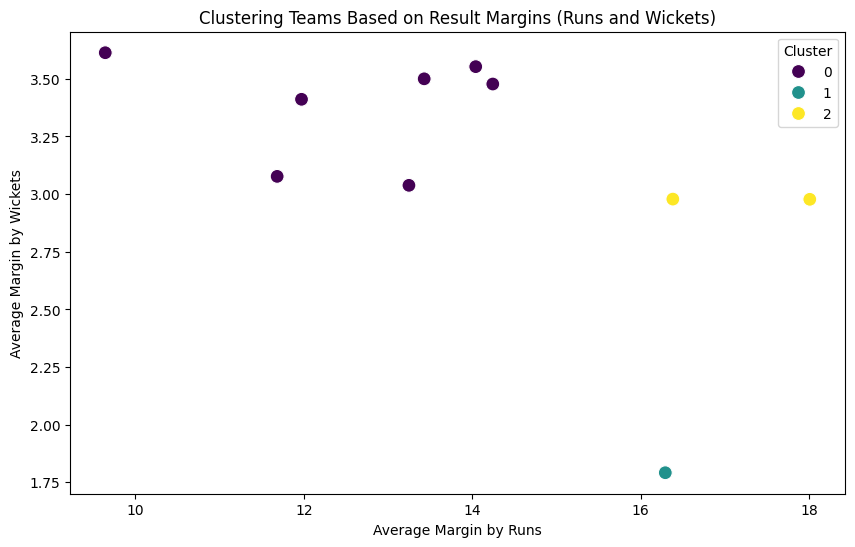

                        winner  avg_margin_runs  avg_margin_wickets  cluster
0          Chennai Super Kings        18.007519            2.977444        2
1               Delhi Capitals         9.641509            3.613208        0
2               Gujarat Titans        13.428571            3.500000        0
3        Kolkata Knight Riders        14.040650            3.552846        0
4         Lucknow Super Giants        16.291667            1.791667        1
5               Mumbai Indians        16.381295            2.978417        2
6                 Punjab Kings        11.682692            3.076923        0
7             Rajasthan Royals        11.971963            3.411215        0
8  Royal Challengers Bengaluru        14.243243            3.477477        0
9          Sunrisers Hyderabad        13.247619            3.038095        0


In [32]:
# Ensure result_margin_runs and result_margin_wickets exist
if 'result_margin_runs' in matches.columns and 'result_margin_wickets' in matches.columns:
    # Group by winner to calculate average result margins
    team_margins = matches.groupby('winner').agg(
        avg_margin_runs=('result_margin_runs', 'mean'),
        avg_margin_wickets=('result_margin_wickets', 'mean')
    ).reset_index()

    # Scale the features for clustering
    scaler = StandardScaler()
    scaled_margins = scaler.fit_transform(team_margins[['avg_margin_runs', 'avg_margin_wickets']])

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    team_margins['cluster'] = kmeans.fit_predict(scaled_margins)

    # Scatter plot for clustering
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='avg_margin_runs',  # X-axis: Average result margin by runs
        y='avg_margin_wickets',  # Y-axis: Average result margin by wickets
        hue='cluster',  # Color by cluster
        palette='viridis',
        data=team_margins,
        s=100  # Size of points
    )
    plt.title('Clustering Teams Based on Result Margins (Runs and Wickets)')
    plt.xlabel('Average Margin by Runs')
    plt.ylabel('Average Margin by Wickets')
    plt.legend(title='Cluster')
    plt.show()

    # Print clustered data
    print(team_margins)
else:
    print("Columns 'result_margin_runs' and 'result_margin_wickets' not found.")


**Clustering: Team Performance Based on Toss Outcomes**

**Cluster 0: Teams with Moderate Toss Performance**

Teams that play frequently but have inconsistent success in converting toss wins into match victories.
Examples: Sunrisers Hyderabad, Royal Challengers Bengaluru, Rajasthan Royals.

**Cluster 1: High Toss Efficiency with Fewer Matches Played**

Teams with fewer matches but high toss-match win ratios, leveraging toss wins effectively.
Examples: Gujarat Titans, Lucknow Super Giants.

**Cluster 2: Consistent Teams with High Toss Success**

Established teams with a strong toss record and better conversion rates in matches.
Examples: Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders.

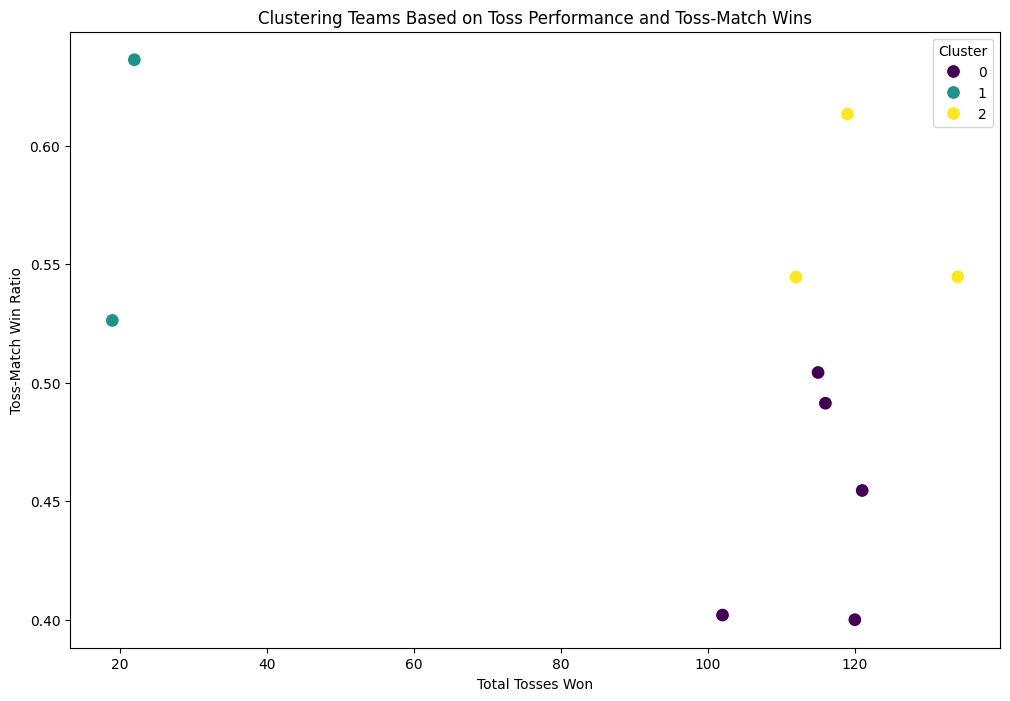

                          team  total_matches_played  total_tosses_won  \
0               Mumbai Indians                   244               134   
1          Sunrisers Hyderabad                   241               120   
2  Royal Challengers Bengaluru                   239               115   
3               Delhi Capitals                   236               121   
4        Kolkata Knight Riders                   236               112   
5                 Punjab Kings                   231               102   
6          Chennai Super Kings                   230               119   
7             Rajasthan Royals                   214               116   
8               Gujarat Titans                    45                22   
9         Lucknow Super Giants                    44                19   

   toss_match_wins  toss_match_win_ratio  cluster  
0               73              0.544776        2  
1               48              0.400000        0  
2               58           

In [33]:
# Calculate total matches played by each team
matches_played = pd.concat([matches['team1'], matches['team2']]).value_counts().reset_index()
matches_played.columns = ['team', 'total_matches_played']

# Calculate total tosses won by each team
tosses_won = matches['toss_winner'].value_counts().reset_index()
tosses_won.columns = ['team', 'total_tosses_won']

# Calculate matches where the team won the toss and the match
toss_match_wins = matches[matches['toss_winner'] == matches['winner']]['toss_winner'].value_counts().reset_index()
toss_match_wins.columns = ['team', 'toss_match_wins']

# Merge all metrics into a single DataFrame
team_stats = matches_played.merge(tosses_won, on='team', how='left')
team_stats = team_stats.merge(toss_match_wins, on='team', how='left')

# Fill missing values (teams that didn't win a toss or toss-match)
team_stats.fillna(0, inplace=True)

# Add Toss-Match Win Ratio
team_stats['toss_match_win_ratio'] = team_stats['toss_match_wins'] / team_stats['total_tosses_won']
team_stats['toss_match_win_ratio'] = team_stats['toss_match_win_ratio'].fillna(0)

# Standardize the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(team_stats[['total_matches_played', 'total_tosses_won', 'toss_match_win_ratio']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
team_stats['cluster'] = kmeans.fit_predict(scaled_features)

# Scatter plot for clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='total_tosses_won',
    y='toss_match_win_ratio',
    hue='cluster',
    palette='viridis',
    data=team_stats,
    s=100
)
plt.title('Clustering Teams Based on Toss Performance and Toss-Match Wins')
plt.xlabel('Total Tosses Won')
plt.ylabel('Toss-Match Win Ratio')
plt.legend(title='Cluster')
plt.show()

# Display team statistics with clusters
print(team_stats)

## **Week 8-9: Baseline Training and Evaluation Experiments**


*   Decision Trees: A tree-based model known for its interpretability and ability to handle categorical and numerical data efficiently.
*   k-Nearest Neighbors (k-NN): A simple yet effective instance-based algorithm that classifies data points based on their proximity to labeled neighbors.
*   Random Forest: An ensemble learning method that combines multiple decision trees to improve prediction accuracy and mitigate overfitting.



The models are evaluated using appropriate classification metrics such as accuracy, precision, recall, and F1-score.

**Feature Engineering**
- Extract relevant features from the dataset (e.g., recent performance of teams, head-to-head statistics).
- Create additional features based on domain knowledge, such as toss impact and venue advantage.

In [34]:
matches['toss_winner_decision'] = matches['toss_winner_encoded'].astype(str) + "_" + matches['toss_decision'].astype(str)

# Creating interaction between 'venue' and 'team1'
matches['venue_team1'] = matches['venue_encoded'].astype(str) + "_" + matches['team1_encoded'].astype(str)

# Creating interaction between 'venue' and 'team2'
matches['venue_team2'] = matches['venue_encoded'].astype(str) + "_" + matches['team2_encoded'].astype(str)

matches['team1_team2'] = matches['team1_encoded'].astype(str) + "_" + matches['team2_encoded'].astype(str)
matches['Result_result margin'] = matches['result_encoded'].astype(str) + "_" + matches['result_margin'].astype(str)
matches['targetruns_result margin'] = matches['target_runs'].astype(str) + "_" + matches['result_margin'].astype(str)



# Optionally, encode these new features using a technique appropriate for your model
# For demonstration, let's use OrdinalEncoder if these are to be treated as categorical but ordinal
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform these new features
matches[['toss_winner_decision', 'venue_team1', 'venue_team2','team1_team2','Result_result margin','targetruns_result margin']] = encoder.fit_transform(
    matches[['toss_winner_decision', 'venue_team1', 'venue_team2','team1_team2', 'Result_result margin','targetruns_result margin']])

**Split the dataset into training and testing subsets.**

In [58]:
X = matches[['result_encoded', 'result_margin', 'target_runs', 'team1_encoded', 'team2_encoded', 'toss_winner_encoded', 'venue_encoded', 'toss_decision_encoded', 'toss_winner_decision']]
y = matches['winner_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (784, 9)
Testing data size: (196, 9)


**k-Nearest Neighbors (k-NN)**

We employed a k-Nearest Neighbors (k-NN) classifier, using 1 neighbor for predictions, to model match outcomes. The model achieved an accuracy of 52.55% on the test set, with precision, recall, and F1-score each at 46%. While its performance is lower, k-NN provides a simple, non-parametric approach that classifies instances based on their proximity in the feature space.

To determine the optimal value of k for a K-Nearest Neighbors (KNN) model by analyzing the error rate for different values of k

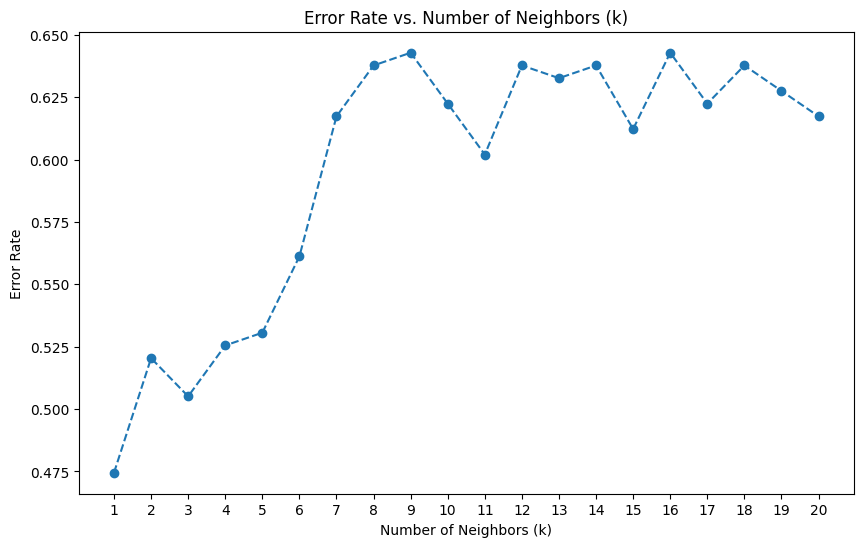

In [59]:

errors = []
for k in range(1, 21): # Test for different values of k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errors, marker='o', linestyle='--')
plt.title('Error Rate vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.show()

**Train the model using the training dataset and Evaluation**



In [60]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the KNN classifier on test set:', accuracy)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy of the KNN classifier on test set: 0.46938775510204084
Precision: 0.47
Recall: 0.41
F1 Score: 0.41
Confusion Matrix:
[[15  4  0  2  0  0  0  0  0  0]
 [10  7  0  2  0  1  0  0  0  0]
 [ 3  0  0  3  0  0  0  0  0  0]
 [ 1  3  0 15  0  4  1  0  0  0]
 [ 0  0  0  2  1  2  0  0  0  0]
 [ 0  0  0  2  1 13  7  4  0  0]
 [ 0  0  0  1  0  9  4  1  0  0]
 [ 2  0  0  1  0  5  5 12  0  1]
 [ 0  0  0  0  0  2  1 13 12  0]
 [ 0  0  0  0  0  0  1  8  2 13]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**`Decision Trees`**

We implemented a Decision Tree Classifier to predict match outcomes, leveraging its interpretability and ability to handle both categorical and numerical features effectively. The model achieved an accuracy of 69.39% on the test set, with a precision of 74%, recall of 68%, and an F1-score of 69%.

In [61]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the decision tree classifier on test set:', accuracy)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy of the decision tree classifier on test set: 0.6938775510204082
Precision: 0.74
Recall: 0.68
F1 Score: 0.69
Confusion Matrix:
[[19  0  0  1  0  1  0  0  0  0]
 [ 0 16  0  2  1  1  0  0  0  0]
 [ 0  1  3  2  0  0  0  0  0  0]
 [ 0  4  0 15  0  2  2  0  0  1]
 [ 1  0  0  1  3  0  0  0  0  0]
 [ 1  2  0  1  0 19  2  1  1  0]
 [ 1  1  0  2  0  0 11  0  0  0]
 [ 2  1  0  3  0  2  2 13  2  1]
 [ 0  1  0  2  0  0  0  0 23  2]
 [ 0  0  0  2  0  3  0  0  5 14]]


**Random Forest**

We utilized a Random Forest Classifier with 100 estimators to predict match outcomes, leveraging its ensemble learning capabilities for improved accuracy and robustness. The model achieved an accuracy of 73.47% on the test set, with a precision of 77%, recall of 72%, and an F1-score of 73%. These results highlight the model's ability to handle complex relationships in the dataset effectively. The confusion matrix demonstrates the Random Forest's balanced performance across multiple classes, showcasing its potential as a reliable predictive model for this classification task.

In [62]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Random Forest classifier on test set:', accuracy)


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy of the Random Forest classifier on test set: 0.7346938775510204
Precision: 0.77
Recall: 0.72
F1 Score: 0.73
Confusion Matrix:
[[19  1  0  0  0  1  0  0  0  0]
 [ 1 16  0  2  0  1  0  0  0  0]
 [ 0  2  4  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  2  1  0  0  0]
 [ 0  1  0  1  3  0  0  0  0  0]
 [ 1  1  0  1  0 21  3  0  0  0]
 [ 1  1  0  0  0  3  8  1  0  1]
 [ 2  2  1  1  0  2  2 13  1  2]
 [ 2  1  0  0  0  2  0  1 18  4]
 [ 1  0  0  1  0  1  0  0  0 21]]


## **Week 9-11: Neural Networks**

We have used a Multi-Layer Perceptron (MLP) in this project to build a predictive model. MLP is a feedforward neural network comprising input, hidden, and output layers, capable of learning complex, non-linear relationships in the data.

We employed a MLP to predict match outcomes, leveraging its ability to learn complex, non-linear relationships in the dataset. The model, configured with two hidden layers (100 and 50 neurons) and the ReLU activation function, achieved an accuracy of 83.16% on the test set. Key performance metrics, including a precision of 82%, recall of 77%, and F1-score of 79%, highlight its effectiveness. The confusion matrix further demonstrates the model's reliability across multiple classes, making it a strong candidate for this classification task.

In [77]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50),
                           activation='logistic',
                           solver='adam',
                           learning_rate_init=0.001,
                           max_iter=1000,
                           alpha=0.01,
                           random_state=42)

mlp_model.fit(X_train_scaled, y_train)

# Predict on training data
y_train_pred = mlp_model.predict(X_train_scaled)

# Predict on test data
y_test_pred = mlp_model.predict(X_test_scaled)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Training Accuracy of the MLP classifier:', train_accuracy)
print('Testing Accuracy of the MLP classifier:', test_accuracy)

# Calculate additional metrics for test set
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Training Accuracy of the MLP classifier: 0.9272959183673469
Testing Accuracy of the MLP classifier: 0.8673469387755102
Precision: 0.79
Recall: 0.75
F1 Score: 0.74
Confusion Matrix:
[[19  2  0  0  0  0  0  0  0  0]
 [ 5 15  0  0  0  0  0  0  0  0]
 [ 0  4  1  1  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  1  0  0  0]
 [ 0  0  0  2  0  3  0  0  0  0]
 [ 0  0  0  0  0 25  1  1  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  2  2 22  0  0]
 [ 0  0  0  0  0  1  0  1 26  0]
 [ 0  0  0  0  0  0  0  0  0 24]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [76]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30,30),
                           activation='logistic',
                           solver='adam',
                           learning_rate_init=0.005,
                           max_iter=1000,
                           alpha=0.0001,
                           random_state=42)

mlp_model.fit(X_train_scaled, y_train)

# Predict on training data
y_train_pred = mlp_model.predict(X_train_scaled)

# Predict on test data
y_test_pred = mlp_model.predict(X_test_scaled)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Training Accuracy of the MLP classifier:', train_accuracy)
print('Testing Accuracy of the MLP classifier:', test_accuracy)

# Calculate additional metrics for test set
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Training Accuracy of the MLP classifier: 0.9948979591836735
Testing Accuracy of the MLP classifier: 0.9540816326530612
Precision: 0.95
Recall: 0.96
F1 Score: 0.95
Confusion Matrix:
[[20  1  0  0  0  0  0  0  0  0]
 [ 0 19  1  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  1  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  2  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  1  1 24  0  0]
 [ 0  0  0  1  0  0  1  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 24]]


In [78]:
# # Define parameter grid for hyperparameter tuning
# param_grid = {
#     'hidden_layer_sizes': [(50, 50), (100, 50), (50, 30, 30)],
#     'activation': ['logistic', 'tanh', 'relu'],
#     'learning_rate_init': [0.001, 0.005, 0.01],
#     'alpha': [0.0001, 0.001, 0.1],  # Regularization strength
#     'max_iter': [1000, 1500]
# }

# # Initialize the MLP model
# mlp = MLPClassifier(solver='adam', random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# # Fit the model to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Display the best parameters and best score
# print("Best parameters found:", grid_search.best_params_)
# print("Best cross-validation accuracy:", grid_search.best_score_)

# # Evaluate the best model on the test set
# best_mlp = grid_search.best_estimator_
# y_test_pred = best_mlp.predict(X_test_scaled)

# # Calculate test accuracy and additional metrics
# test_accuracy = accuracy_score(y_test, y_test_pred)
# precision = precision_score(y_test, y_test_pred, average='macro')
# recall = recall_score(y_test, y_test_pred, average='macro')
# f1 = f1_score(y_test, y_test_pred, average='macro')
# conf_matrix = confusion_matrix(y_test, y_test_pred)

# # Display results
# print('Testing Accuracy of the best MLP classifier:', test_accuracy)
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)